<a href="https://colab.research.google.com/github/shanOnline99/Machine-Learning/blob/main/Lab2_2019e107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2

EC9630: Machine Learning

2019/E/107

1. Load the protein tertiary structure dataset from UCI data repository.

In [ ]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv'
data = pd.read_csv(url)
data

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


2. Study the dataset.

In [ ]:
print('Dataset shape:', data.shape)
print('Column names:', data.columns)
print('Data types:', data.dtypes)
print('Summary statistics:')
print(data.describe())

Dataset shape: (45730, 10)
Column names: Index(['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype='object')
Data types: RMSD    float64
F1      float64
F2      float64
F3      float64
F4      float64
F5      float64
F6      float64
F7      float64
F8        int64
F9      float64
dtype: object
Summary statistics:
               RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.092500     10.310100   
25%        2.305000   6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000   8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000  12126.150000   3786.410000      0.342890    133.646750   
max       20.999000  40034.900000  

3. Divide the dataset into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('RMSD',axis = 1) #features
y = data['RMSD']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

4. Build a linear regression model on the train data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #model create
model.fit(X_train, y_train) #fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5. Evaluate your model on the test data.

In [ ]:
predict = model.predict(X_test)
predict

array([7.16676976, 6.44758814, 5.73960555, ..., 9.15032799, 8.82366848,
       8.14976294])

6. Plot your test target data against the predicted data.

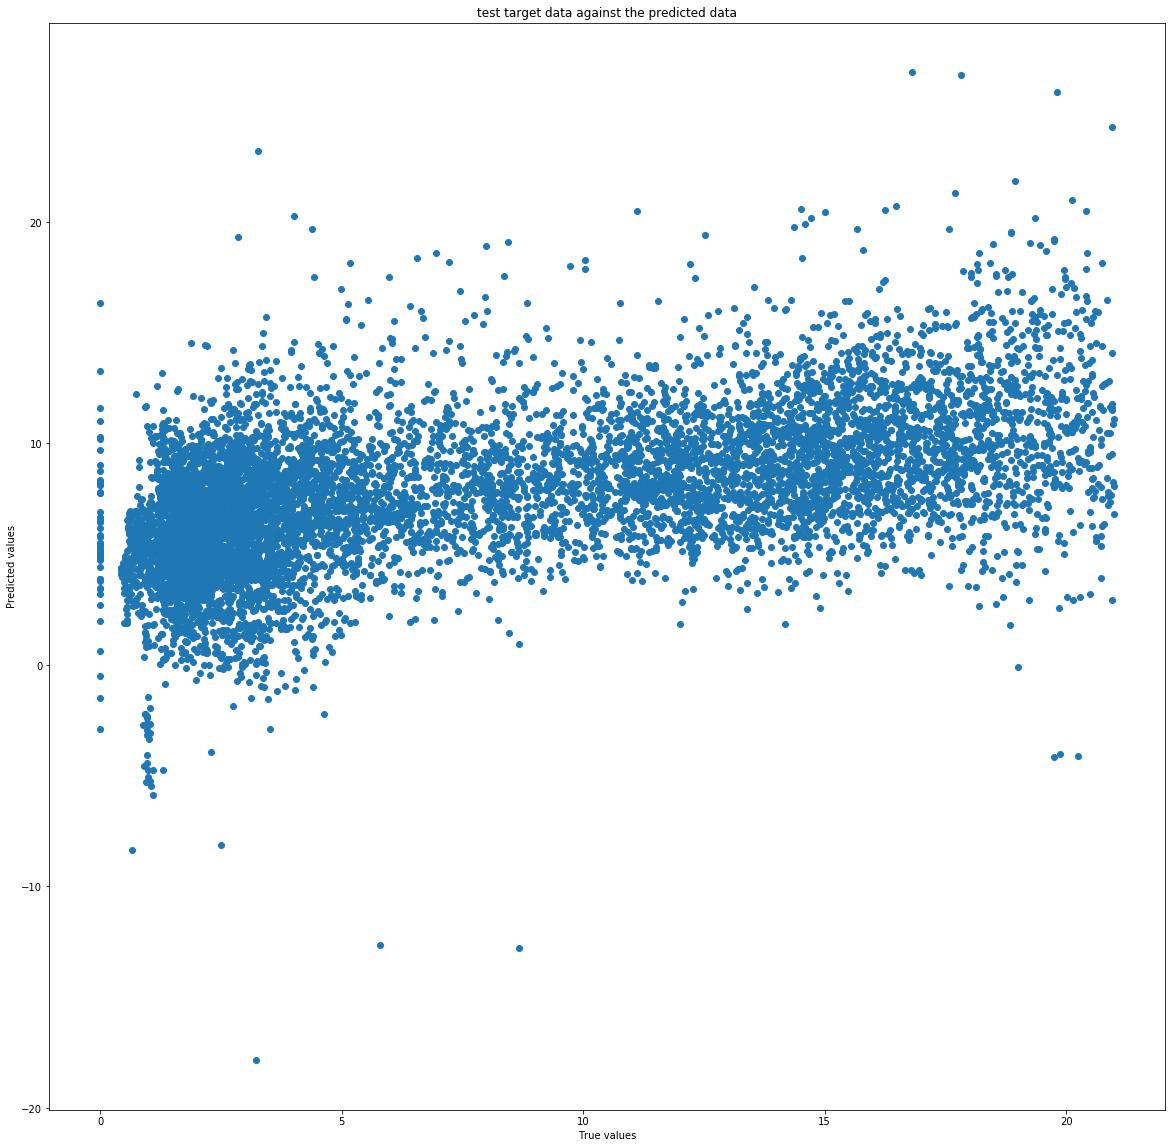

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(y_test, predict)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('test target data against the predicted data')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

7. Now use the random forest regressor to build a regression model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
new_model = RandomForestRegressor(n_estimators = 200) #create the random forest regression model
new_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

8. Evaluate the model on test data and plot the predicted value as above

In [ ]:
ran_predict = new_model.predict(X_test)

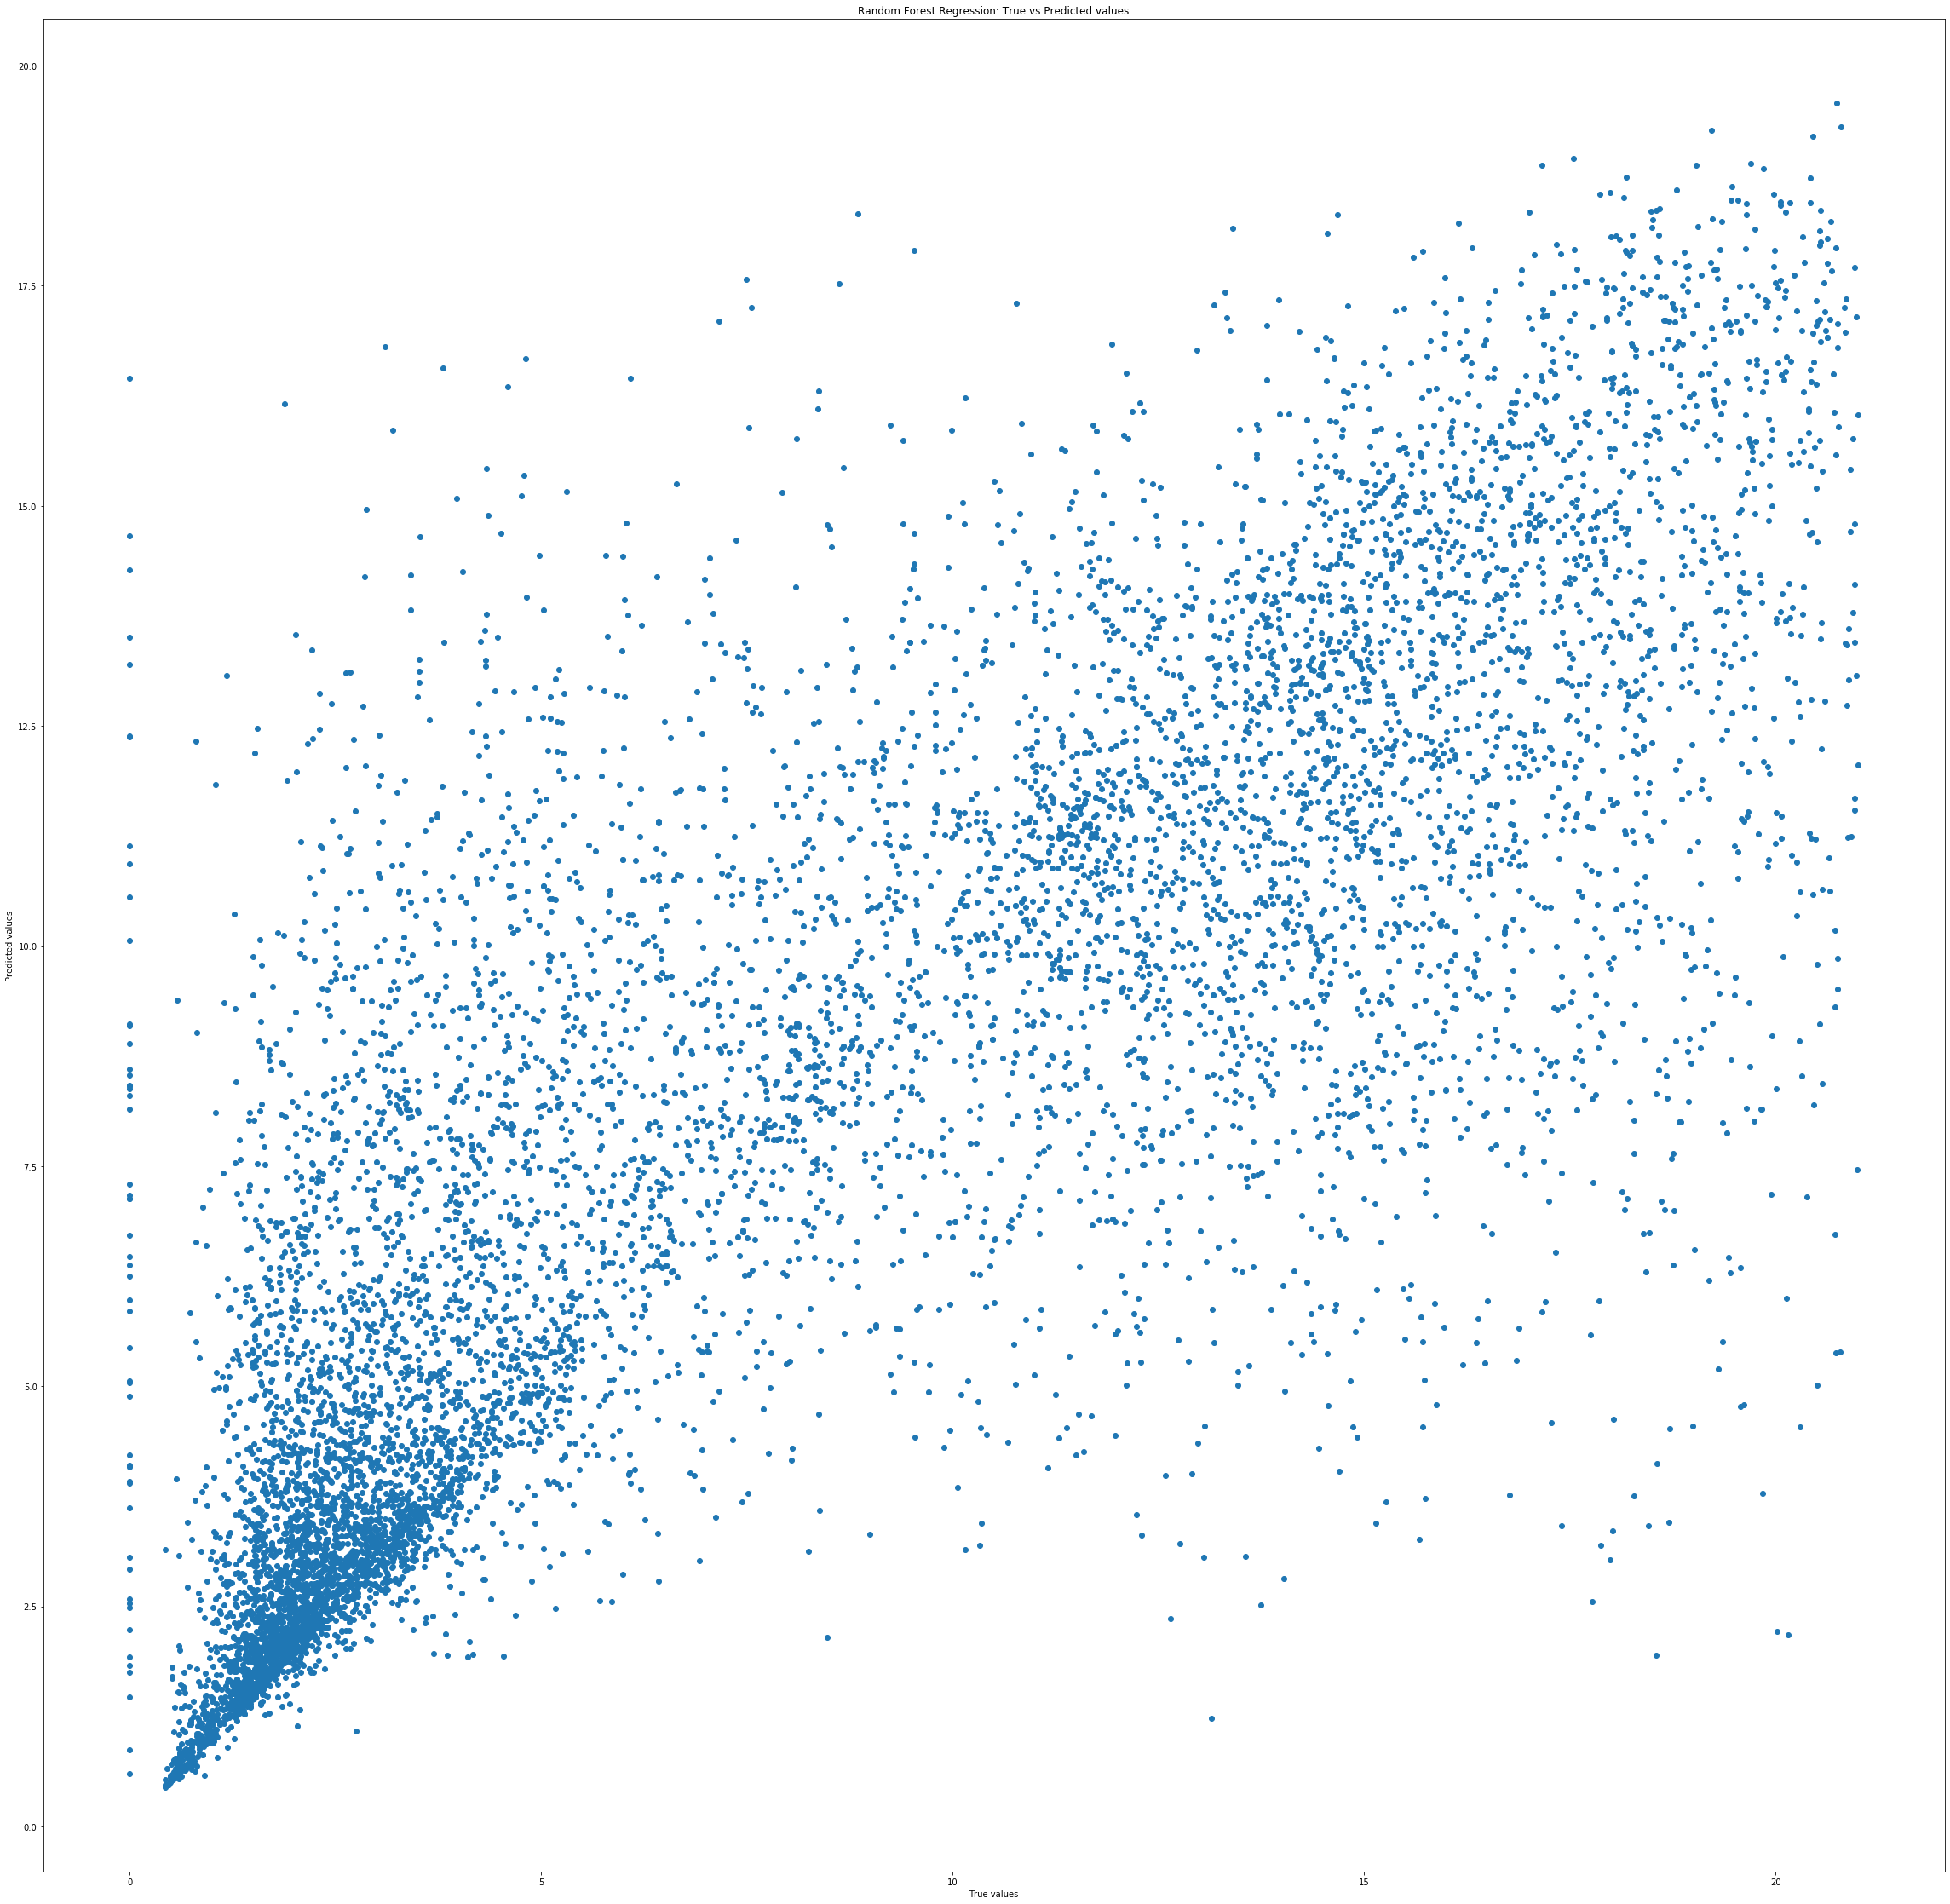

In [ ]:
plt.scatter(y_test, ran_predict)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression: True vs Predicted values')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

9. Compare the results by different regression methods.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict)
R2 = r2_score(y_test,predict)

ran_mse = mean_squared_error(y_test, ran_predict)
ran_R2 = r2_score(y_test, ran_predict)

print("\tLinear Regression")
print("Mean Squared Error\t:", mse)
print("R-squared\t\t:", R2)

print("\n\tRandom Forest Regression")
print("Mean Squared Error\t:", ran_mse)
print("R-squared\t\t:", ran_R2)

	Linear Regression
Mean Squared Error	: 27.105709090165
R-squared		: 0.2772190492915524

	Random Forest Regression
Mean Squared Error	: 12.347132466383417
R-squared		: 0.6707604249388991
